In [1]:
import TensorflowUtils as utils
import tensorflow as tf
import numpy as np
import read_MITSceneParsingData as scene_parsing

# A hack for jupyter
tf.flags.DEFINE_string('f', '', 'kernel')

from FCN import *

# tf.flags.DEFINE_integer("batch_size", "2", "batch size for training")
# tf.flags.DEFINE_string("logs_dir", "logs/", "path to logs directory")
# tf.flags.DEFINE_string("data_dir", "Data_zoo/MIT_SceneParsing/", "path to dataset")
# tf.flags.DEFINE_float("learning_rate", "1e-4", "Learning rate for Adam Optimizer")
# tf.flags.DEFINE_string("model_dir", "Model_zoo/", "Path to vgg model mat")
# tf.flags.DEFINE_bool('debug', "False", "Debug mode: True/ False")
# tf.flags.DEFINE_string('mode', "train", "Mode train/ test/ visualize")

# FLAGS = tf.flags.FLAGS
# print(FLAGS.model_dir)

In [2]:

MODEL_URL = 'http://www.vlfeat.org/matconvnet/models/beta16/imagenet-vgg-verydeep-19.mat'
MAX_ITERATION = int(1e5 + 1)
NUM_OF_CLASSESS = 151
IMAGE_SIZE = 224


model_data = utils.get_model_data(FLAGS.model_dir, MODEL_URL)
mean = model_data['normalization'][0][0][0]
mean_pixel = np.mean(mean, axis=(0, 1))
weights = np.squeeze(model_data['layers'])

keep_probability = tf.placeholder(tf.float32, name="keep_probabilty")
image = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE, IMAGE_SIZE, 3], name="input_image")
annotation = tf.placeholder(tf.int32, shape=[None, IMAGE_SIZE, IMAGE_SIZE, 1], name="annotation")
print("annotation.shape: %s" % annotation.shape)

print("image.shape: %s" % image.shape)
processed_image = utils.process_image(image, mean_pixel)



annotation.shape: (?, 224, 224, 1)
image.shape: (?, 224, 224, 3)


Found pickle file!
{'image': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/images/training/ADE_train_00000832.jpg', 'annotation': 'Data_zoo/MIT_SceneParsing/ADEChallengeData2016/annotations/training/ADE_train_00000832.png', 'filename': 'ADE_train_00000832'}


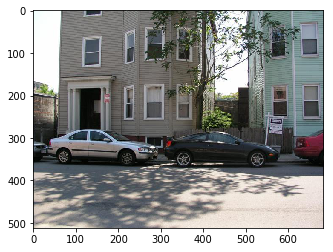

In [3]:
from pylab import *
import PIL.Image
%matplotlib inline

def showarray(a, fmt='jpeg'):
    """Show images in array data.
    """
    a = np.uint8(np.clip(a, 0, 255))
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
train_records, valid_records = scene_parsing.read_dataset(FLAGS.data_dir)
print(train_records[0])

img = imread(train_records[1]['image'])
imshow(img)

In [4]:
pred_annotation, logits = inference(image, keep_probability)


setting up vgg initialized conv layers ...
image.shape: (?, 224, 224, 3)
kernels.shape: (3, 3, 3, 64), bias.shape: (1, 64)
kernels.shape: (3, 3, 64, 64), bias.shape: (1, 64)
kernels.shape: (3, 3, 64, 128), bias.shape: (1, 128)
kernels.shape: (3, 3, 128, 128), bias.shape: (1, 128)
kernels.shape: (3, 3, 128, 256), bias.shape: (1, 256)
kernels.shape: (3, 3, 256, 256), bias.shape: (1, 256)
kernels.shape: (3, 3, 256, 256), bias.shape: (1, 256)
kernels.shape: (3, 3, 256, 256), bias.shape: (1, 256)
kernels.shape: (3, 3, 256, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
kernels.shape: (3, 3, 512, 512), bias.shape: (1, 512)
deconv_shape1.shape: (?, 14, 14, 512)
conv_t3.shape: (?, ?, ?, 151)
Ins

In [5]:
sess = tf.Session()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())
ckpt = tf.train.get_checkpoint_state(FLAGS.logs_dir)
if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)
    print("Model restored...")


(224, 224, 3)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


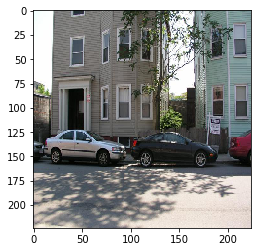

In [6]:
# import scipy.misc as misc

# resize_image = misc.imresize(img,[IMAGE_SIZE, IMAGE_SIZE], interp='nearest')
# print(resize_image.shape)
# imshow(resize_image)

(1, 224, 224, 1)
(224, 224)
2
[[133  25  90 ...  58  89  75]
 [100 105  10 ...  82  61 118]
 [ 49  62 123 ... 141  30   4]
 ...
 [141  29  15 ... 123 114 106]
 [ 85  32  31 ...  20 131  75]
 [127  77  87 ...  76 135  74]]


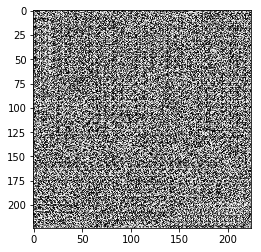

In [7]:
# Do prediction
# pred = sess.run(pred_annotation, feed_dict={image: [resize_image], keep_probability: 0.85})
# print(pred.shape)
# pred = np.squeeze(pred, axis=3)
# pred = np.transpose(pred, (1, 2, 0))
# pred = np.squeeze(pred)
# print(pred.shape)
# data = np.asarray(pred)
# print(data.ndim)
# print(data)
# imshow(data, cmap=gray())

In [ ]:
image_options = {'resize': True, 'resize_size': IMAGE_SIZE}

train_dataset_reader = dataset.BatchDatset(train_records, image_options)
# pred = sess.run(pred_annotation, feed_dict={image: train_dataset_reader.next_batch(FLAGS.batch_size), keep_probability: 1.0})

Initializing Batch Dataset Reader...
{'resize': True, 'resize_size': 224}


In [ ]:
images = train_dataset_reader.next_batch(FLAGS.batch_size)
print(images[0].shape)
print(images[1].shape)
plt.figure()
imshow(images[0][0])
plt.figure()
imshow(images[0][1])
plt.figure()
imshow(np.squeeze(images[1][0]))
plt.figure()
imshow(np.squeeze(images[1][1]))

In [ ]:
preds = sess.run(pred_annotation, feed_dict={image: images[0], keep_probability: 0.85})
print(preds.shape)
plt.figure()
imshow(np.squeeze(preds[0]), cmap=gray())
plt.figure()
imshow(np.squeeze(preds[1]), cmap=gray())
print(preds[0] == preds[1])

In [ ]:
from IPython import display

def showPrediction(train_images):
    preds = sess.run(pred_annotation, feed_dict={image: train_images, keep_probability: 0.85})
    print(preds.shape)
    fig = plt.figure()
    imshow(train_images[0])
    display.display(fig)
    fig = plt.figure()
    imshow(np.squeeze(preds[0]), cmap=gray())
    display.display(fig)
    
# Do training
from six.moves import xrange

# Define trainning loss function.
loss = tf.reduce_mean((tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                                      labels=tf.squeeze(annotation, squeeze_dims=[3]),
                                                                      name="entropy")))
trainable_var = tf.trainable_variables()
train_op = train(loss, trainable_var)

sess.run(tf.global_variables_initializer())

for itr in xrange(MAX_ITERATION):
    train_images, train_annotations = train_dataset_reader.next_batch(FLAGS.batch_size)
    # print("train images shape: ")
    # print(train_images[0].shape)
    
    feed_dict = {image: train_images, annotation: train_annotations, keep_probability: 0.85}
    
    sess.run(train_op, feed_dict=feed_dict)
    
    if (itr * FLAGS.batch_size) % 10 == 0:
        train_loss = sess.run(loss, feed_dict=feed_dict)
        display.clear_output()
        print("Step: %d, Train_loss:%g" % (itr, train_loss))
        
        showPrediction(train_images)
        
    
    if (itr * FLAGS.batch_size) % 500 == 0:
        # valid_images, valid_annotations = validation_dataset_reader.next_batch(FLAGS.batch_size)
        # valid_loss = sess.run(loss, feed_dict={image: valid_images, annotation: valid_annotations,
        #                                       keep_probability: 1.0})
        # print("%s ---> Validation_loss: %g" % (datetime.datetime.now(), valid_loss))
        saver.save(sess, FLAGS.logs_dir + "model.ckpt", itr)
